In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import skimage
import skimage.transform
import os
import cv2
from tqdm import tqdm

In [3]:
imageSize=32
train_dir = "C:\\Users\\Aakash\\Desktop\\Projects\\SLI\\23079_29550_bundle_archive\\asl_alphabet_train\\asl_alphabet_train\\"
test_dir =  "C:\\Users\\Aakash\\Desktop\\Projects\\SLI\\23079_29550_bundle_archive\\asl_alphabet_test\\asl_alphabet_test\\"

In [4]:
def get_data(folder):
    """
    Loading the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [5]:
import os
os.getcwd()
os.chdir("D:\\Coding")

In [6]:
os.getcwd()

'D:\\Coding'

In [7]:
#X_train, y_train = get_data(train_dir)
#X_test, y_test= get_data(test_dir) # Too few images

In [8]:
from numpy import asarray
from numpy import save
from numpy import load

In [9]:
# save to npy file
save('datalabelsignlanguage.npy', y_train)
save('datasignlanguage.npy', X_train)

NameError: name 'y_train' is not defined

In [10]:
X_train=load('datasignlanguage.npy')
y_train=load('datalabelsignlanguage.npy')

In [11]:
X_train.shape

(87000, 32, 32, 3)

In [12]:
y_train.shape

(87000,)

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
import keras

Using TensorFlow backend.
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aakash\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [15]:
# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)

In [16]:
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

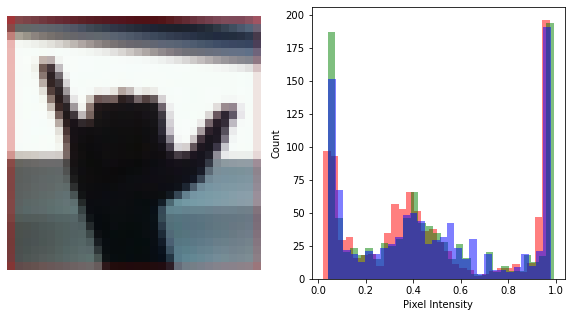

In [17]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[82])

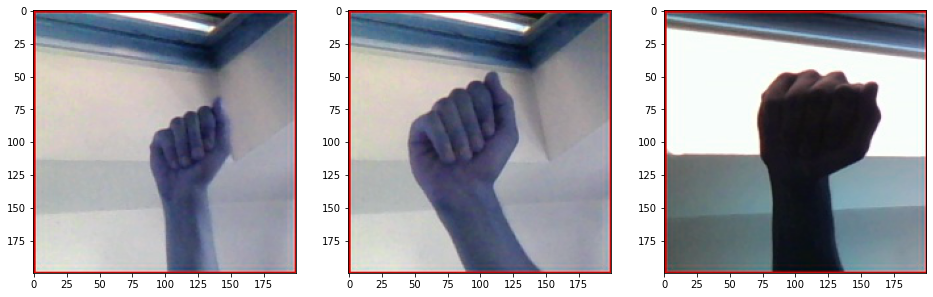

In [18]:
from glob import glob
import random
multipleImages = glob("C:\\Users\\Aakash\\Desktop\\Projects\\SLI\\23079_29550_bundle_archive\\asl_alphabet_train\\asl_alphabet_train\\A\\**")
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    #;
plotThreeImages(multipleImages)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


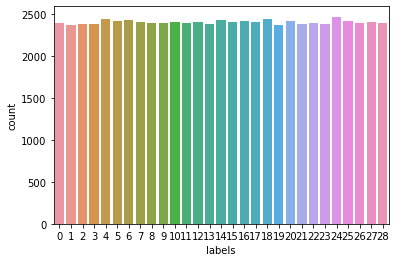

In [19]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()

sns.countplot(lab)
print(dict_characters)

In [20]:
import keras
from keras.callbacks import ModelCheckpoint

In [21]:

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (16,16))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [22]:
import tensorflow
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, AveragePooling2D
from keras.models import Model, Sequential
from keras.layers import Activation, Dense

In [23]:
from keras.layers import Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19 
from keras.applications import ResNet50
#base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
base_model=ResNet50(include_top=False, input_shape=(imageSize, imageSize, 3), pooling = 'avg', weights="imagenet")

In [24]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization

In [25]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  176


In [91]:
base_model=ResNet50(include_top=False, input_shape=(imageSize, imageSize, 3), pooling = 'avg', weights="imagenet")
base_model.trainable = True

In [92]:
#retrain_from=20
#for layer in base_model.layers[retrain_from:]:
    #layer.trainable =  False
model = Sequential()
#model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(base_model)

model.add(Dense(30, activation ='softmax'))

# Say not to train first layer (ResNet) model as it is already trained
#model.layers[0].trainable = True


In [93]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_21 (Dense)             (None, 30)                61470     
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________


In [94]:

sgd = keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

In [95]:
history = model.fit(X_train,y_trainHot, epochs=5, validation_data=(X_test,y_testHot), verbose=1,callbacks = [MetricsCheckpoint('logs')])

Train on 30000 samples, validate on 17400 samples
Epoch 1/5
30000/30000 [==============================] - 100s 3ms/step - loss: 2.7685 - accuracy: 0.2323 - val_loss: 2.9100 - val_accuracy: 0.2329
Epoch 2/5
30000/30000 [==============================] - 119s 4ms/step - loss: 1.3224 - accuracy: 0.5577 - val_loss: 2.1376 - val_accuracy: 0.5080
Epoch 3/5
30000/30000 [==============================] - 94s 3ms/step - loss: 0.7859 - accuracy: 0.7296 - val_loss: 1.6872 - val_accuracy: 0.6751
Epoch 4/5
30000/30000 [==============================] - 82s 3ms/step - loss: 0.5478 - accuracy: 0.8096 - val_loss: 1.5742 - val_accuracy: 0.6182
Epoch 5/5
30000/30000 [==============================] - 83s 3ms/step - loss: 0.4063 - accuracy: 0.8587 - val_loss: 2.0067 - val_accuracy: 0.6787


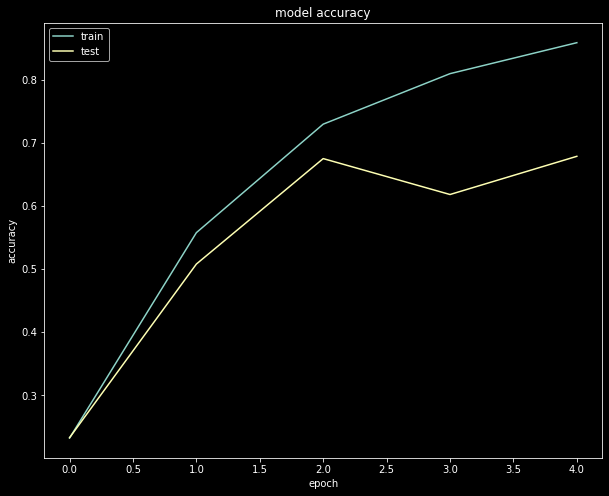

In [96]:
from matplotlib import style
style.use('dark_background')
plt.figure(figsize=((10,8)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

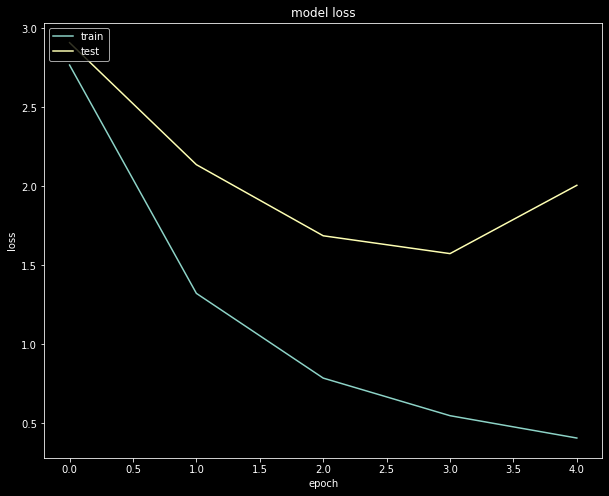

In [97]:
plt.figure(figsize=((10,8)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [100]:
sgd = keras.optimizers.SGD(lr = 0.01/100, decay = 1e-7, momentum = 0.95, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

In [101]:
initial_epochs = 5

In [102]:

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_21 (Dense)             (None, 30)                61470     
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________


In [103]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train,y_trainHot,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(X_test,y_testHot),verbose=1,callbacks = [MetricsCheckpoint('logs')])

Train on 30000 samples, validate on 17400 samples
Epoch 5/10
30000/30000 [==============================] - 104s 3ms/step - loss: 0.2362 - accuracy: 0.9196 - val_loss: 0.1153 - val_accuracy: 0.9648
Epoch 6/10
30000/30000 [==============================] - 82s 3ms/step - loss: 0.1864 - accuracy: 0.9365 - val_loss: 0.0992 - val_accuracy: 0.9694
Epoch 7/10
30000/30000 [==============================] - 102s 3ms/step - loss: 0.1705 - accuracy: 0.9414 - val_loss: 0.0921 - val_accuracy: 0.9712
Epoch 8/10
30000/30000 [==============================] - 91s 3ms/step - loss: 0.1637 - accuracy: 0.9440 - val_loss: 0.0866 - val_accuracy: 0.9743
Epoch 9/10
30000/30000 [==============================] - 121s 4ms/step - loss: 0.1560 - accuracy: 0.9465 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 10/10
30000/30000 [==============================] - 140s 5ms/step - loss: 0.1445 - accuracy: 0.9518 - val_loss: 0.0780 - val_accuracy: 0.9757


In [104]:
from matplotlib import style
style.use('dark_background')

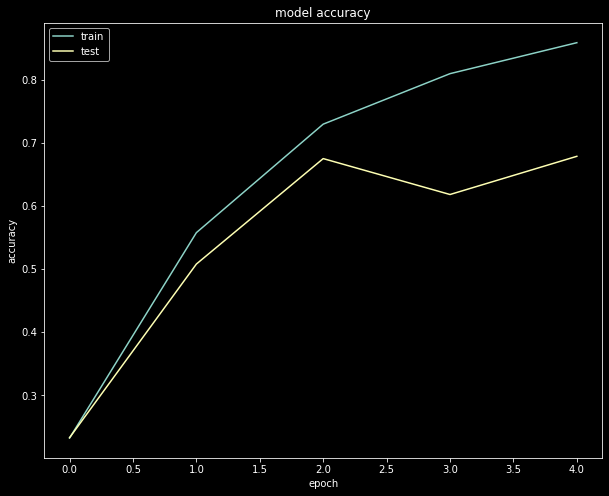

In [105]:
plt.figure(figsize=((10,8)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

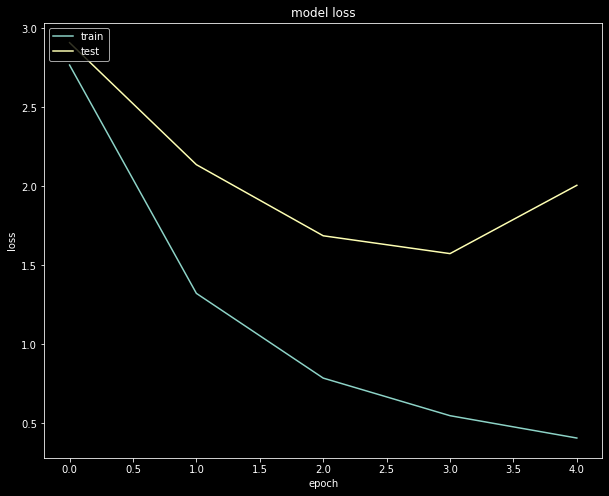

In [106]:
plt.figure(figsize=((10,8)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [111]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

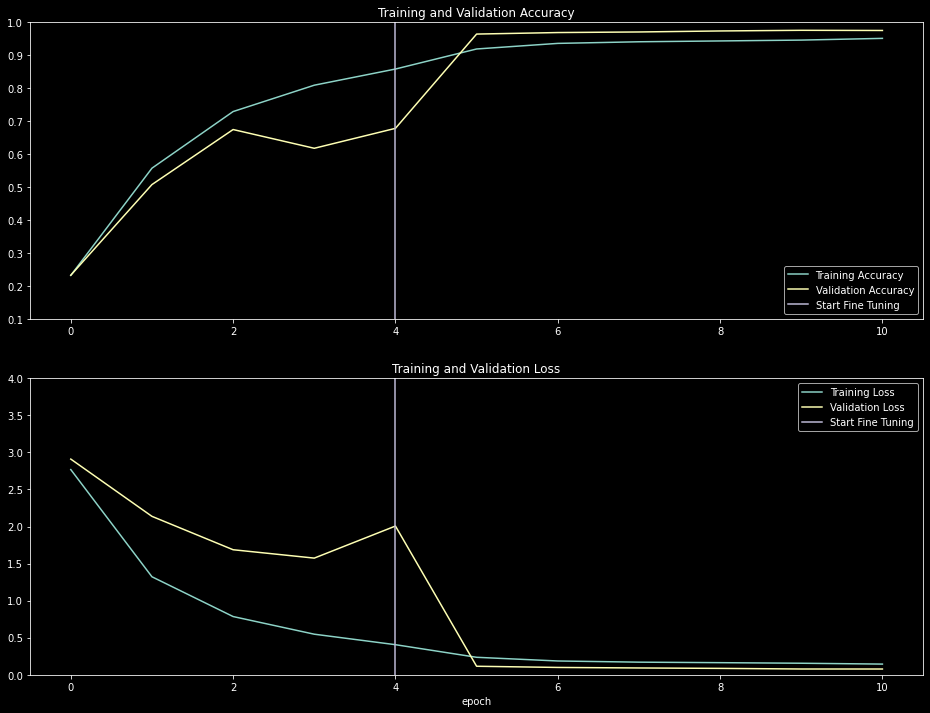

In [112]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.1, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 4])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [113]:
#making prediction and target classes equal in length, removing other class
y_pred = model.predict(X_test)
a=np.where(y_testHot>0)[1]
b=np.argmax(y_pred,axis=1)
names=list(map_characters.values())
names.pop()
print('\n', sklearn.metrics.classification_report(a, b, target_names=names)) 



               precision    recall  f1-score   support

           A       0.99      0.95      0.97       608
           B       0.97      0.96      0.97       632
           C       1.00      0.98      0.99       628
           D       0.98      1.00      0.99       619
           E       0.97      0.96      0.96       563
           F       0.98      1.00      0.99       586
           G       1.00      0.99      0.99       580
           H       0.98      0.96      0.97       599
           I       0.98      0.99      0.99       606
           J       0.99      1.00      0.99       615
           K       0.97      0.97      0.97       595
           L       0.99      1.00      0.99       607
           M       0.98      0.99      0.98       599
           N       1.00      0.99      1.00       620
           O       0.99      0.99      0.99       578
           P       1.00      0.97      0.98       604
           Q       0.97      1.00      0.99       586
           R       0.95  

In [114]:
score = model.evaluate(X_test,y_testHot, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')


Keras CNN - accuracy: 0.9757471084594727 



In [115]:
import itertools

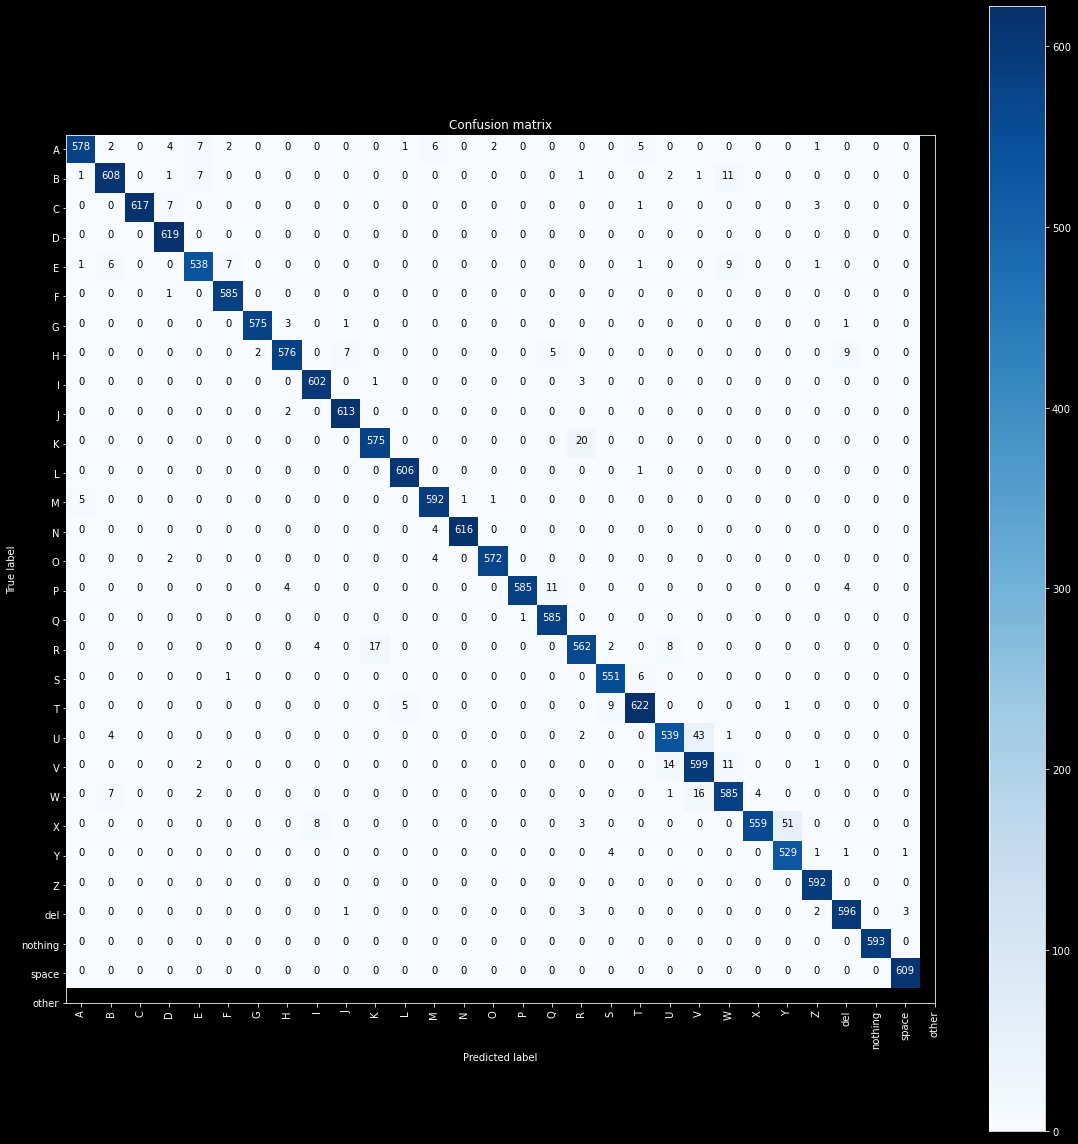

In [116]:
from sklearn.metrics import confusion_matrix
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_testHot,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = list((map_characters.values())))